# Structure
* Over view of Object Oriented Programming
    * Different Data Structures Built in to python
        * Lists, Sequences, Dictionaries, Classes
    * Mainly want to work with classes
* What is OOP...s I did it again (holla britney)
    * Pillars (encapuslation, inheritance, abstraction)
    * Advantages
    * Disadvantages

* How to use Object Oriented Programming
    * Defining a class (self, __init__(self, fields[])
    * Fields
    * internal functions
    
* Usefullness
    * Is it faster than a 2d list?
    * Readability

* Applications to astronomy (maybe)
    * Create a class object
    * Create subtypes maybe galaxy and star
    * Have valid fields and methods
    * show dunder methods (override add, subtract, repr)
    * have a sampled data set and write a mehthod to import the data

# What is OOP?
![Whoopsy](https://i1.wp.com/absolutebritney.com/wp-content/uploads/2016/03/again-2.gif?resize=540%2C250&ssl=1)

# First: What is an object?
In computer science, an object is essentially anything that can either store or manipulate data. E.G any datatype or even a function that can be represented by a valid identifier. It combines data and functionality 

# What is a class?
A class is a user defined object. Essentially create your own data type. 

Variables that belong to an object or class are referred to as **fields**. Objects can also have functionality by using functions that belong to a class. Such functions are called **methods** of the class. Together the fields and methods of the class are defined as the class's **attributes**

# Now OOP
## There are 4 Pillars to Object Oriented Programming (OOP)
![](https://qph.ec.quoracdn.net/main-qimg-c7c7aad178ea2f646832c5e2f02368f6)


## 1.) Encapsulation

The ability to store multiple fields or functionality into one object. The principle of encapsulation holds that users should be able to perform computations with an object without necessarily caring about how it is implemented internally.
```
import math

class Vector2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)
    def heading(self):
        return math.atan2(self.y, self.x) * 180 / math.pi
```


## 2.) Inheritance

We don't have to write the same code twice. Once class can inherit from another class and thus contain the same fields and functions as the parent class

```
class Demo2(Demo):
    def __init__(self, fields):
        super(Demo2, self).__init__(fields)
        self.field3 = fields[2]
```


## 3.) Polymorphism

The ability to define multiple methods with the same name in related class.

```
class Demo:
    def method(self):
        pass
        
class DemoA(Demo)
    def method(self):
        print "I am DemoA - Overridden Parent Method"

class DemoB(Demo):
    def method(self):
        print "I am DemoB - Overridden Parent Method"
```


## 4.) Abstraction

Gives the ability to hide the source code from imported libraries. We just have: 
```
from astropy.io import fits
```

yet we don't know exactly how the 
```
hdu = fits.open()
``` 
function actually works. 

**But all hail open source projects.**

*Not really going to go over this*

In [14]:
###Python Class in it's simplest form

class Person(object):
    pass

me = Person()
me.name = "Samuel Wyatt"
me.attr = "Rides his bike too fast"

you = Person()
you.name = "genEric Pearson"
you.attr = "If he was a spice, he'd be flour"

print me.name, me.attr
print you.name, you.attr

#me = you
#print me.name

Samuel Wyatt Rides his bike too fast
genEric Pearson If he was a spice, he'd be flour


In [15]:
###let's define a very easy example, and then we will do something a bit more applicable
import datetime

class Person(object):
    def __init__(self, first, last, birthday=None, attr=None):
        self.first = first
        self.last = last
        self.birthday = birthday
        self.attr = attr if attr is not None else "Nothing"
    
    #@property
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    #@property
    def age(self):
        if self.birthday is None:
            return 0
        born = self.birthday
        today = datetime.date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
me = Person("Samuel", "Wyatt", datetime.date(1991, 12, 23), "Cool")

print me.fullname()
me.first = "Sam"
print me.fullname()
print me.age()
print me.attr

Samuel Wyatt
Sam Wyatt
25
Cool


In [16]:
you = Person("genEric", "Pearson", datetime.date(2006, 6, 6), "might be the devil")

#Put a bunch of people in a list, loop over them
for person in [me, you]:
    print person.fullname(), person.attr, person.age()

Sam Wyatt Cool 25
genEric Pearson might be the devil 11


In [24]:
#Lets introduce some inheritance

class Course(object):
    def __init__(self, name, instructor, room, time, day, students=None):
        self.name = name
        self.instructor = instructor
        self.room = room
        self.time = time
        self.day = day
        self.students = students if students is not None else []
        
        instructor.courses.append(self)
    
    def list_students(self):
        for stud in self.students:
            print stud.fullname()
            
    def add_students(self, students_add):
        for stud in students_add:
            self.students.append(stud)
            stud.courses.append(self)

    def remove_students(self, students_rem):
        for stud in students_rem:
            if stud in self.students:
                self.students.remove(stud)
            if self in stud.courses:
                stud.courses.remove(self)
    
class Student(Person):
    def __init__(self, first, last, birthday, attr=None, courses=None):
        super(Student, self).__init__(first, last, birthday, attr)
        self.courses = courses if courses is not None else []
    

class Professor(Person):
    def __init__(self, first, last, birthday, pay, attr=None, courses=None):
        super(Professor, self).__init__(first, last, birthday, attr)
        self.pay = pay
        self.courses = courses if courses is not None else []
        

In [26]:
astro_prof = Professor("Allyn", "Smith", None, 80000, "hawaian shirts friday", None)

astro_course = Course("Stellar Evolution", astro_prof, "400", "10:00am", "MWF", None)

print astro_prof.courses[0].name

#redefine ourselves as students
me = Student("Samuel", "Wyatt", datetime.date(1991, 12, 23), "Cool")
you = Student("genEric", "Pearson", datetime.date(2006, 6, 6), "might be the devil")

astro_course.add_students([me, you])
astro_course.list_students()

#Show relationship between all the classes
astro_prof.courses[0].list_students()

Stellar Evolution
Samuel Wyatt
genEric Pearson
Samuel Wyatt
genEric Pearson


In [27]:
#print me.courses[0].name

#AstroCourse.RemoveStudents([me])

for stud in astro_course.students:
    print stud.fullname(), stud.age()
    
print me.courses[0].name

Samuel Wyatt 25
genEric Pearson 11
Stellar Evolution


# Now a more astronomical example: 
* Import an old dataset as a csv format. 
* Store the rows as a class object appended into a list
* Analyze the data



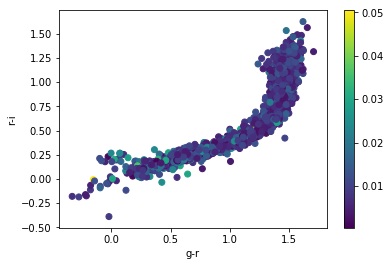

In [20]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

nra = 1
ndec = 2
gmag = 5
rmag = 15
imag = 25
zmag = 35
Ymag = 45
gmag_err = 9
rmag_err = 19
imag_err = 29
zmag_err = 39
Ymag_err = 49

class star_phot_data:
    def __init__(self, data):
        self.ra = float(data[nra])
        self.dec = float(data[ndec])
        self.gmag = float(data[gmag])
        self.rmag = float(data[rmag])
        self.imag = float(data[imag])
        self.zmag = float(data[zmag])
        self.Ymag = float(data[Ymag])
        
        self.gmag_err = float(data[gmag_err])
        self.rmag_err = float(data[rmag_err])
        self.imag_err = float(data[imag_err])
        self.zmag_err = float(data[zmag_err])
        self.Ymag_err = float(data[Ymag_err])
        
        #initialization assignments
        self.clr_gr = self.gmag - self.rmag
        self.clr_ri = self.rmag - self.imag
        self.clr_iz = self.rmag - self.zmag
        self.clr_zY = self.zmag - self.Ymag

starinfo = []
with open("All_filters_Stripe82.csv") as in_file:
    reader = csv.reader(in_file)
    next(reader, None)
    for line in in_file:
        #for i,a in enumerate(line.split(',')):
        #    print i, a
        #break
        starinfo.append(star_phot_data(line.split(',')))
        
fig, ax = plt.subplots()
xdat = [x.clr_gr for x in starinfo]
ydat = [x.clr_ri for x in starinfo]
aux_dat = [x.rmag_err for x in starinfo]
cax = ax.scatter(xdat, ydat, c=aux_dat)
cbar = fig.colorbar(cax)
plt.xlabel("g-r")
plt.ylabel("r-i")
plt.show()

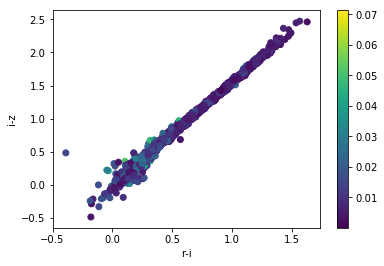

In [21]:
fig, ax = plt.subplots()
xdat = [x.clr_ri for x in starinfo]
ydat = [x.clr_iz for x in starinfo]
aux_dat = [x.imag_err for x in starinfo]
cax = ax.scatter(xdat, ydat, c=aux_dat)
cbar = fig.colorbar(cax)
plt.xlabel("r-i") 
plt.ylabel("i-z")
plt.show()

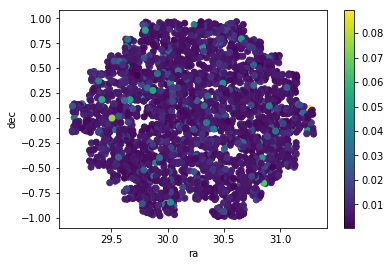

In [22]:
fig, ax = plt.subplots()
xdat = [x.ra for x in starinfo]
ydat = [x.dec for x in starinfo]
aux_dat = [x.Ymag_err for x in starinfo]
cax = ax.scatter(xdat, ydat, c=aux_dat)
cbar = fig.colorbar(cax)
plt.xlabel("ra")
plt.ylabel("dec")
plt.show()

# Another Example
Analyze the speed of importing a large csv as a class vs a 2d array

In [28]:
%matplotlib inline

import time

#### Indexes from imported csv
nra = 4
ndec = 5
band = 18
rms = 42
k_coef = 40
mag_psf = 7
exptime = 22
zeropoint = 9
a_coef = 36
airmass = 20
mag_calib = 58
b_coef = 38
stdcolor0 = 49

class astr_obj:
    def __init__(self, data):
        self.RA = float(data[nra])
        self.DEC = float(data[ndec])
        self.filter = data[band]
        self.rms = float(data[rms])
        self.k_coef = float(data[k_coef])
        self.mag_psf = float(data[mag_psf])
        self.exptime = float(data[exptime])
        self.zeropoint = float(data[zeropoint])
        self.a_coef = float(data[a_coef])
        self.airmass = float(data[airmass])
        self.b_coef = float(data[b_coef])
        self.stdcolor0 = float(data[stdcolor0])
    
    @property
    #mag_calib=mag_psf+2.5*log10(exptime)-zeropoint-a-k*airmass
    def mag_calib(self):
        return self.mag_psf + 2.5*math.log10(self.exptime)-self.zeropoint-self.a_coef - (self.k_coef*self.airmass)

def csvcolumns(data):
    return [float(data[nra]),
            float(data[ndec]),
            data[band],
            float(data[rms]),
            float(data[k_coef]),
            float(data[mag_psf]),
            float(data[exptime]),
            float(data[zeropoint]),
            float(data[a_coef]),
            float(data[airmass]),
            float(data[b_coef]),
            float(data[stdcolor0])]

def twodarray_magcalib(d):
    return (d[6] + 2.5*math.log10(d[7]) - d[8] - d[9] - (d[4]*d[10]))

starinfo = []
start = time.time()

with open("stripe82.csv") as in_file:
    reader = csv.reader(in_file)
    next(reader, None)
    for line in in_file:
        starinfo.append(astr_obj(line.split(',')))
        
end = time.time()
print "elapsed time, initializing classes", end-start

starinfo2 = []
start = time.time()

with open("stripe82.csv") as in_file:
    reader = csv.reader(in_file)
    next(reader, None)
    for line in in_file:
        starinfo2.append(csvcolumns(line.split(',')))
        
end = time.time()
print "elapsed time, storing as arrays", end-start

start = time.time()
gband_info = [x.mag_calib for x in starinfo if x.filter == "g"]
rband_info = [x.mag_calib for x in starinfo if x.filter == "r"]
iband_info = [x.mag_calib for x in starinfo if x.filter == "i"]
zband_info = [x.mag_calib for x in starinfo if x.filter == "z"]
end = time.time()
print "elaplsed time, calculating calibrated magnitudes, class property", end-start

start = time.time()

gband_info2 = [twodarray_magcalib(x) for x in starinfo2 if x[2] == "g"]
rband_info2 = [twodarray_magcalib(x) for x in starinfo2 if x[2] == "r"]
iband_info2 = [twodarray_magcalib(x) for x in starinfo2 if x[2] == "i"]
zband_info2 = [twodarray_magcalib(x) for x in starinfo2 if x[2] == "z"]
end = time.time()
print "elaplsed time, calculating calibrated magnitudes, array method", end-start



elapsed time, initializing classes 1.72862792015
elapsed time, storing as arrays 1.83496499062
elaplsed time, calculating calibrated magnitudes, class property 0.354492902756
elaplsed time, calculating calibrated magnitudes, array method 0.279624938965


# Overriding magic/dunder methods
Objects have built in methods that can be overridden.
like how `str` and `int` have there own addition functions.

```
a = 5
b = 6
a + b = 11

w = "a"
x = "b"

w + x = "ab"
```

These methods can be overridden for classes as well.
Let's take a look at the Vector2D class defined above

In [35]:

class Vector2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)
    def heading(self):
        return math.atan2(self.y, self.x) * 180 / math.pi
    def __add__(self, other):
        return Vector2D(self.x + other.x, self.y + other.y)
    def __sub__(self, other):
        return Vector2D(self.x - other.x, self.y - other.y)
    
v1 = Vector2D(2,5)
v2 = Vector2D(-4,6)

v3 = v1 + v2
v4 = v3 - v2

print "x:", v3.x, "y:", v3.y, "mag:", v3.magnitude()
print "x:", v4.x, "y:", v4.y, "mag:", v4.magnitude()

x: -2 y: 11 mag: 11.1803398875
x: 2 y: 5 mag: 5.38516480713
